# Patch Basics

December 2, 2024

This notebook Shows how to work with DASCore's [`Patch`](https://dascore.org/api/dascore/core/patch/Patch.html). It is a shortened version of the [DASCore's Patch tutorial](https://dascore.org/tutorial/patch.html). 

<a target="_blank" href="https://colab.research.google.com/github/DASDAE/seg_tutorial/blob/master/02_patch.ipynb">
</a>  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

#### Useful links: 
* [Chambers et al., 2024](https://seismica.library.mcgill.ca/article/view/1184)
* [Colab link](https://colab.research.google.com/github/DASDAE/seg_tutorial/blob/master/02_patch.ipynb)
* [DASCore documentation](https://dascore.org)
* [ObsPy documentation](https://github.com/obspy/obspy/wiki/)
* [Xarray documentation](https://docs.xarray.dev/en/stable/)


In [ ]:
%%capture

# First ensure DASCore is installed. If not, install and restart the kernel.
try:
    import dascore as dc
except ImportError:
    !pip install dascore
    !pip install ipympl
    # resetart kernel
    import IPython
    IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel


# Patch
To demonstrate the patch, we use an example seismic event recorded shown in [this study](https://www.frontiersin.org/journals/earth-science/articles/10.3389/feart.2022.907749/full).

The `Patch` is composed of:
- data: the array of measurements
- attrs: the non-coordinate metdata
- dims: a tuple of dimension names (eg 'time', 'distance')
- coords: The coordinates of each dimension (plus others)

It is *immutable* which means that once a patch is created it cannot (easily) be changed. This makes it safe to share compontents between patches and simplifies parallel processing. 

The patch design was inspired by [Xarray's DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html).

In [4]:
# The get_example_patch function is useful for loading example/test patches.
patch = dc.get_example_patch("example_event_1")


In [5]:
# The patch str rep. provides a summary
print(patch)

DASCore Patch ⚡
---------------
➤ Coordinates (distance: 601, time: 1001)
    *distance: CoordRange( min: 400 max: 1000 step: 1 shape: (601,) dtype: int64 )
    *time: CoordRange( min: 00:00:00.119999999 max: 00:00:00.219999999 step: 0.0001s shape: (1001,) dtype: 
datetime64[ns] units: s )
➤ Data (float64)
   [[  -81.   -68.   391. ...    -5.   151.   -22.]
    [ -498.   514.     3. ...    -4.   100.  -149.]
    [ -262.   486.   -79. ...   -47.    28.  -320.]
    ...
    [  333.  1057.  -641. ...   693.   163. -1426.]
    [  405.  -673.   150. ...   209.   232.  -354.]
    [  226.  -524.   378. ...    -5.  -105.  -208.]]
➤ Attributes
    cable_id: 

## Patch Components: Data and Dims

The data array can be accessed with `data` and updated with (`Patch.update`)[https://dascore.org/tutorial/patch.html#update]

In [26]:
# Get the data array
array = patch.data

In [ ]:
# Divide the data by 1_000_000 and create a new patch.
patch_new_data = patch.update(data=array / 1_000_000)

The dimensions are accessed via the `dims` attribute.

In [28]:
print(patch.dims)

('distance', 'time')

### **Exercise** (Patch Data)
Calculate and print following:

1. The number of samples in the data
2. The minimum and maximum value of the data

In [25]:
# The number of samples in the data
num_samples = patch.data.size
print(f"Number of samples: {num_samples}")

# The minimum and maximum value of the data
min_val = patch.data.min()
max_val = patch.data.max()
print(f"Minimum value: {min_val}")
print(f"Maximum value: {max_val}")

Number of samples: 601601

Minimum value: -6102.0

Maximum value: 5975.00146484375

## Patch Components: Attrs
Attrs contain non-dimensional metdata. Acquisition/interrogator identifiers, custom tags, etc.


In [ ]:
print(patch.attrs)

PatchAttrs(
    data_type='',
    data_category='',
    data_units=None,
    instrument_id='',
    acquisition_id='',
    tag='',
    station='',
    network='',
    history=[],
    dims='distance,time',
    coords=<FrozenDict {'distance': CoordSummary(dtype='int64', min=400, max=1000, step=1, units=None), 'time': 
CoordSummary(dtype='datetime64', min=numpy.datetime64('1970-01-01T00:00:00.119999999'), 
max=numpy.datetime64('1970-01-01T00:00:00.219999999'), step=numpy.timedelta64(100000,'ns'), units=<Quantity(1, 
'second')>)}>,
    cable_id=''
)

Notice the data units, `acquisition_id`, and `cable_id` are not set. We could set them like so:

In [ ]:
patch_updated_attrs = patch.update_attrs(
    acquisition_id="experiment_12",
    cable_id="b202393ad",
)
print(patch_updated_attrs)

DASCore Patch ⚡
---------------
➤ Coordinates (distance: 601, time: 1001)
    *distance: CoordRange( min: 400 max: 1000 step: 1 shape: (601,) dtype: int64 )
    *time: CoordRange( min: 00:00:00.119999999 max: 00:00:00.219999999 step: 0.0001s shape: (1001,) dtype: 
datetime64[ns] units: s )
➤ Data (float64)
   [[  -81.   -68.   391. ...    -5.   151.   -22.]
    [ -498.   514.     3. ...    -4.   100.  -149.]
    [ -262.   486.   -79. ...   -47.    28.  -320.]
    ...
    [  333.  1057.  -641. ...   693.   163. -1426.]
    [  405.  -673.   150. ...   209.   232.  -354.]
    [  226.  -524.   378. ...    -5.  -105.  -208.]]
➤ Attributes
    acquisition_id: experiment_12
    cable_id: b202393ad

Note: [Patch.set_units](https://dascore.org/api/dascore/proc/units/set_units.html) and [Patch.convert_units](https://dascore.org/api/dascore/proc/units/convert_units.html) are preferrible for handling data unit conversions.


### **Exercise** (Patch Attrs)
Do the following:

1. Print the cable_id from the patch with updated attrs.
2. Create a new patch with a station name of "DAS1".

In [ ]:
# 1. Print the cable_id from the patch with updated attrs
print(f"Cable ID: {patch_updated_attrs.attrs['cable_id']}")

# 2. Create a new patch with a station name of "DAS1"
patch_with_station = patch.update_attrs(station_name="DAS1")
print(patch_with_station.attrs)

Cable ID: b202393ad

PatchAttrs(
    data_type='',
    data_category='',
    data_units=None,
    instrument_id='',
    acquisition_id='',
    tag='',
    station='',
    network='',
    history=[],
    dims='distance,time',
    coords=<FrozenDict {'distance': CoordSummary(dtype='int64', min=400, max=1000, step=1, units=None), 'time': 
CoordSummary(dtype='datetime64', min=numpy.datetime64('1970-01-01T00:00:00.119999999'), 
max=numpy.datetime64('1970-01-01T00:00:00.219999999'), step=numpy.timedelta64(100000,'ns'), units=<Quantity(1, 
'second')>)}>,
    cable_id='',
    station_name='DAS1'
)

## Patch Components: Coords

`Coords` represent information about the coordinates (not coordinate systems) associated with a patch. These include, but aren't limited to, the dimensions such as 'time' and 'distance'. Non-dimensional coordinates are also supported which can be associated with a dimension or independent. 


In [29]:
print(patch.coords) # The coordinates and their labels. 

➤ Coordinates (distance: 601, time: 1001)
    *distance: CoordRange( min: 400 max: 1000 step: 1 shape: (601,) dtype: int64 )
    *time: CoordRange( min: 00:00:00.119999999 max: 00:00:00.219999999 step: 0.0001s shape: (1001,) dtype: 
datetime64[ns] units: s )

`Coords` objects can be accessed with [`Patch.get_coord`](https://dascore.org/api/dascore/proc/coords/get_coord.html). 

In [30]:
dist_coord = patch.get_coord("distance")

# Get the start, stop, step, and units of the distance coord
dist_start = dist_coord.min()
dist_stop = dist_coord.max()
dist_step = dist_coord.step
dist_units = dist_coord.units

# Get the underlying array data in the coordinate.
dist_array = dist_coord.values

Alternatively, [`Patch.get_array`](https://dascore.org/api/dascore/proc/coords/get_array.html) simply returns the numpy array of the coordinate. 

In [ ]:
# The values of the distance dimension
dist = patch.get_array("distance")

# The value of the time dimension using a numpy datetime64 array.
time = patch.get_array("time")

# Convert the array to seconds from 1970 (floats)
time_s = dc.to_float(time)
# time_s = np.float(time)

Coordinates can be renamed using [`Patch.rename_coord`](https://dascore.org/api/dascore/proc/coords/rename_coords.html)

In [31]:
patch_renamed_coords = patch.rename_coords(distance="depth")
print(patch_renamed_coords.dims)

('depth', 'time')

Or updated using [`Patch.update_coords`](https://dascore.org/api/dascore/proc/coords/update_coords.html)

In [34]:
from dascore.units import m

# Add 12 m to the current distance values.
dist = patch.get_array("distance")
patch_new_dist = patch.update_coords(distance=(dist + 12)*m)

dist2 = patch_new_dist.get_coord("distance")

In [35]:
print(dist2)

CoordRange( min: 412 max: 1012 step: 1 shape: (601,) dtype: int64 units: m )

### **Exercise** (Patch Coords)

Calculate the and print following parameters:

1. The duration (time) of the patch recording using the time coordinate.

2. Reset the start of the time coordiante to noon on the release date of Elton John's single Rocket Man (17 April 1972).


In [38]:
from datetime import datetime

# 1. Calculate the duration of the patch recording
time_coord = patch.get_coord("time")
time_start = time_coord.min()
time_end = time_coord.max()
duration = time_end - time_start
print(f"Duration: {duration}")

# 2. Reset the start of the time coordiante (e.g., 08:00, April 14, 2025)

# New start time
new_start = np.datetime64('1972-04-17T12:00:00') 
current_time = patch.get_array("time")

# Calculate time differences from start
time_delta = current_time - current_time[0]  

# Add to new start time
new_time = new_start + time_delta  

# Create new patch with updated time coordinate
patch_new = patch.update_coords(time=new_time)

print(f"New time range: {patch_new.get_coord('time').min()} to {patch_rocket_man.get_coord('time').max()}")

Duration: 100000000 nanoseconds

New time range: 1972-04-17T12:00:00.000000000 to 1972-04-17T12:00:00.100000000

## Visualization
DASCore provides visualization in the `patch.viz` namespace.


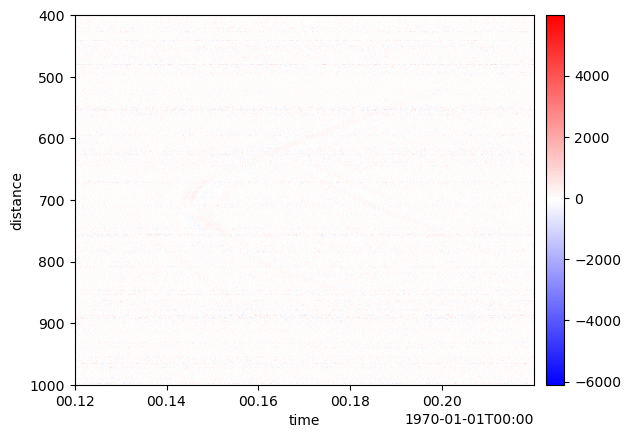

In [ ]:
# The classic waterfall plot
patch.viz.waterfall()

In [ ]:
# Adjust the scale parameter to make the event more visible
# Try different values to see what works best
patch.viz.waterfall(scale=0.03)  # Smaller scale value increases contrast

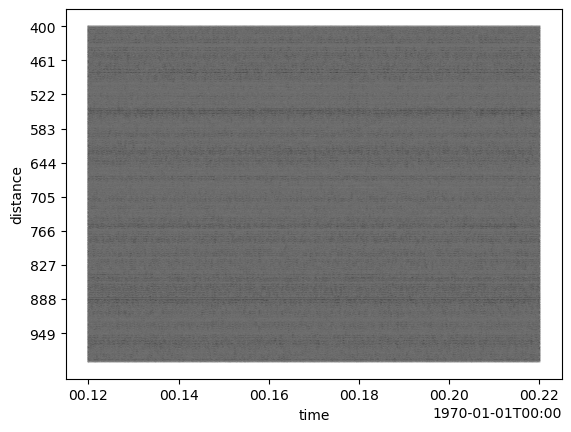

In [ ]:
# A wiggle plot
patch.viz.wiggle()

<Axes: xlabel='time', ylabel='distance'>

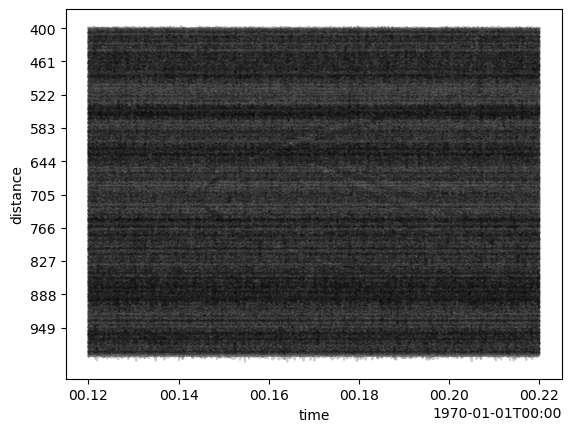

In [43]:
# A wiggle plot
patch.viz.wiggle(scale=0.1) # Smaller scale value increases contrast

## Trimming and sub-selection
[`Patch.select`]() is used to trim patches. For example, to zoom in on the down-going reflection in our example patch. 

In [44]:
trimmed = patch.select(time=(.16, .22), distance =(600,800))

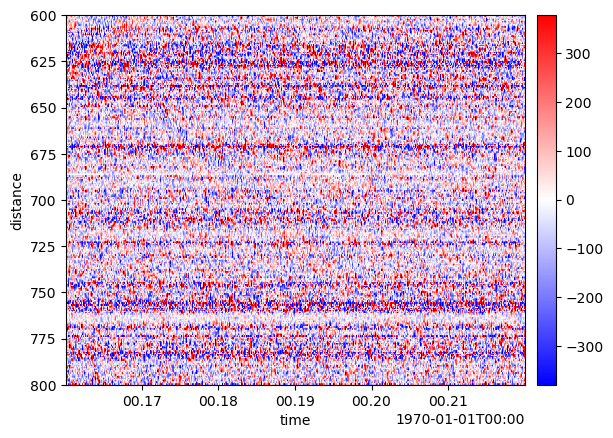

In [ ]:
trimmed.viz.waterfall(scale=0.1)

Trimming can also be done via samples

<Axes: xlabel='time', ylabel='distance'>

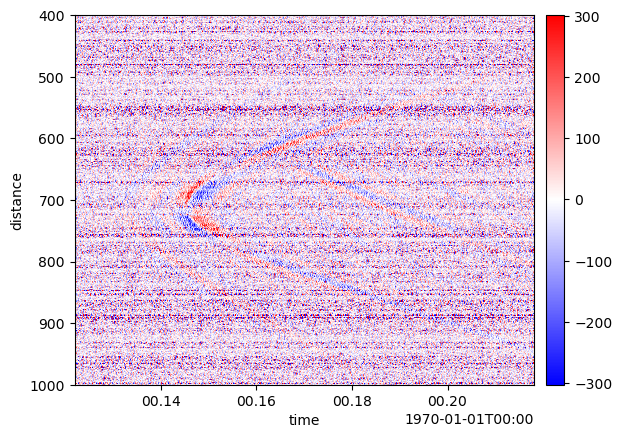

In [49]:
# Remove 20 samples from start and end of time dimension using samples=True
trimmed_patch = patch.select(time=(20, -20), samples=True)
trimmed_patch.viz.waterfall(scale=0.05)

<Axes: xlabel='time', ylabel='distance'>

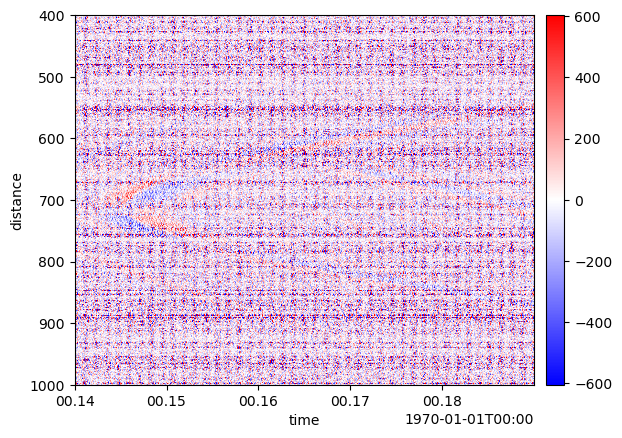

In [ ]:
# Remove 0.02 seconds from start and 0.03 seconds from the end of patch using relative=True
trimmed_patch = patch.select(time=(0.02, -0.03), relative=True)
trimmed_patch.viz.waterfall(scale=0.1)

### **Exercise** (Patch Select)
Remove the first 10 spatial channels then the last .05 seconds. 

In [56]:
# First, remove the first 10 spatial channels
patch_trimmed_distance = patch.select(distance=(10, None), samples=True)

# Then, remove the last 0.05 seconds
patch_final_trim = patch_trimmed_distance.select(time=(None, -0.05), relative=True)

# Verify the trimming worked
print(f"Original patch shape: {patch.data.shape}")
print(f"Trimmed patch shape: {patch_final_trim.data.shape}")


Original patch shape: (601, 1001)

Trimmed patch shape: (591, 501)

## Patch Processing
DASCore provides many [processing](https://dascore.org/api/dascore/proc.html) patch methods. This section will highlight a few of these.


### Pass Filtering
The `Patch.pass_filter` method is used to apply bandpass, lowpass, and highpass SOS filters to the data along a specified dimension.

In [57]:
patch_bp = patch.pass_filter(time=(100, 300))  # apply a 100Hz to 300Hz highpass
patch_lp = patch.pass_filter(time=(..., 300))  # apply a 300Hz lowpass
patch_hp = patch.pass_filter(time=(50, ...))  # apply a 50Hz highpass

### **Exercise** (Patch Processing 1)
Plot each of the filtered patches above. Which filtering technique did the best at accentuating the event signal? 

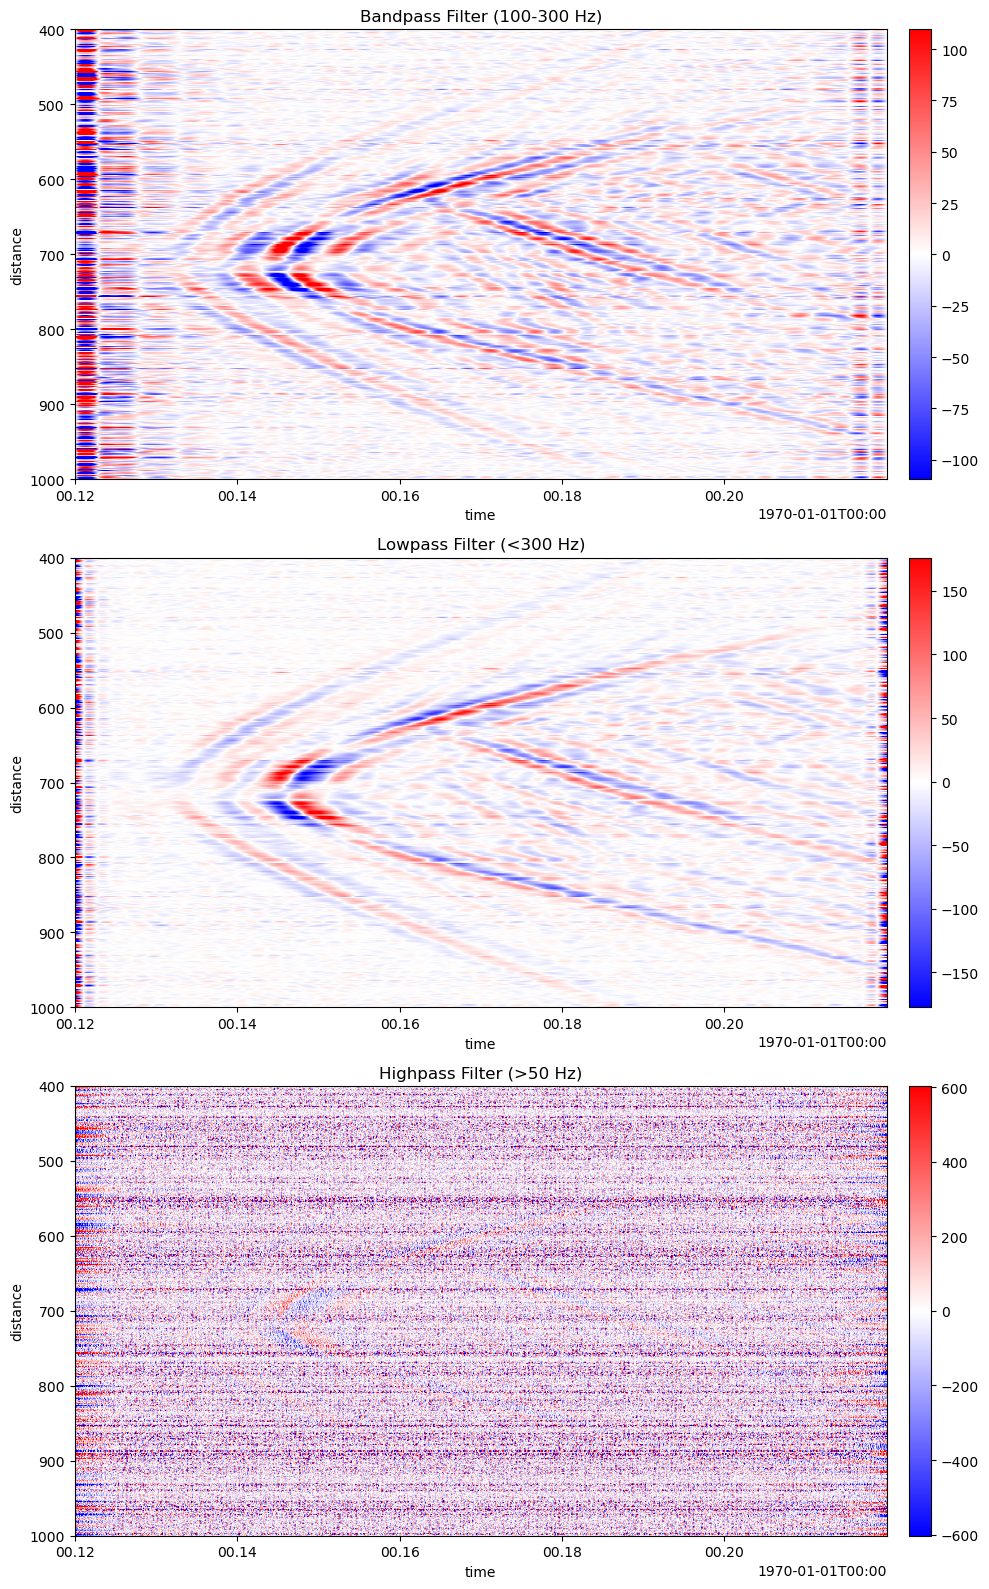

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a figure with 3 subplots
fig = plt.figure(figsize=(10, 16))
gs = GridSpec(3, 1, figure=fig)

# Plot the bandpass filtered patch
ax1 = fig.add_subplot(gs[0, 0])
patch_bp.viz.waterfall(ax=ax1, scale=0.1)
ax1.set_title('Bandpass Filter (100-300 Hz)')

# Plot the lowpass filtered patch
ax2 = fig.add_subplot(gs[1, 0])
patch_lp.viz.waterfall(ax=ax2, scale=0.1)
ax2.set_title('Lowpass Filter (<300 Hz)')

# Plot the highpass filtered patch
ax3 = fig.add_subplot(gs[2, 0])
patch_hp.viz.waterfall(ax=ax3, scale=0.1)
ax3.set_title('Highpass Filter (>50 Hz)')

plt.tight_layout()
plt.show()

# Based on the plots, discuss which filtering technique best accentuates the event signal
# (This would depend on the actual visualization, but typically bandpass would work well
# for isolating seismic events in a specific frequency range)

### Decimate
`decimate` reduces the number of samples in the specified dimension. By default, a lowpass filter is applied to avoid aliasing.

In [ ]:
patch_dec = patch.decimate(time=10)  # keep every 10th sample along time axis

### Detrend

`Patch.detrend` applies a linear detrend along a specified dimension (axis).

In [ ]:
patch_detrended = patch.detrend("time")

### Resample

Like `decimate`, `resample` is used to change the sampling rate of the patch along a specific dimension. Unlike `decimate`, however, non-integar multiples can be used.

In [ ]:
patch_resamp = patch.resample(distance=15)  # change spatial sampling to 15m

### **Exercise** (Processing 2)

Find some methods in the [processing module documentation](https://dascore.org/api/dascore/proc.html) and apply them to the event patch. Visualize the results. 

### Aggregate
[`Patch.aggregate`](https://dascore.org/api/dascore/proc/aggregate/aggregate.html) performs aggregations along specified dimension(s). Shortcuts for `min`, `max`, `mean`, etc. are also provided.

In [ ]:
# Use aggregate and mean to calculate the same patch.
mean_1 = patch.aggregate("time", method="mean")
mean_2 = patch.mean("time")

In [ ]:
# Aggregate supports any tensor reduction operation. 
reduced = patch.aggregate("time", np.sum)
print(reduced)

DASCore Patch ⚡
---------------
➤ Coordinates (distance: 601, time: 1)
    *distance: CoordRange( min: 400 max: 1000 step: 1 shape: (601,) dtype: int64 )
    *time: CoordPartial( step: 0.0001s shape: (1,) dtype: datetime64[ns] units: s )
➤ Data (float64)
   [[-942.001]
    [-973.998]
    [-967.   ]
    ...
    [-888.998]
    [ -93.   ]
    [-426.001]]
➤ Attributes
    history: ["aggregate(dim='time',method='<function sum at 0x1107f6660>')"]
    cable_id: 

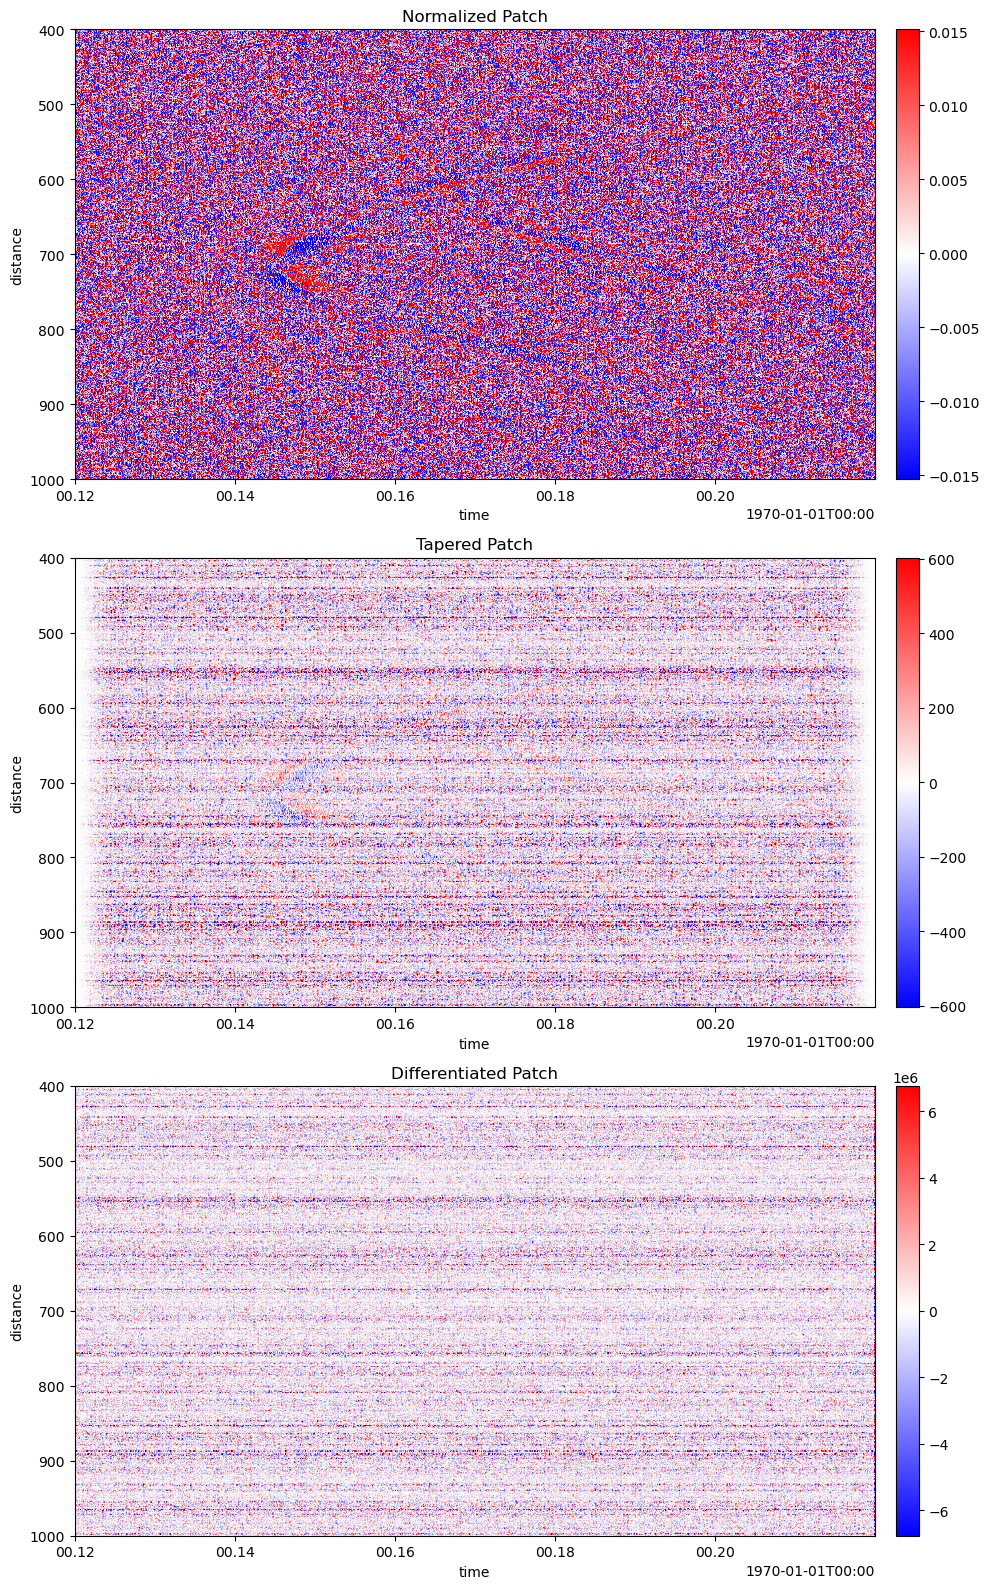

In [ ]:
# 1. Try the normalize method to normalize trace amplitudes
patch_norm = patch.normalize("time")

# 2. Try the taper method to apply a taper to the edges
# Apply an Hanning taper to 5% of each end for time dimension.
patch_taper1 = patch.taper(time=0.05, window_type="hann")
# Apply a triangular taper to 10% of the start of the distance dimension.
patch_taper2 = patch.taper(distance=(0.10, None), window_type='triang')

# 3. Try the differentiate method (velocity to acceleration)
patch_diff = patch.differentiate("time")

# Visualize the results
fig = plt.figure(figsize=(10, 16))
gs = GridSpec(3, 1, figure=fig)

# Plot normalized patch
ax1 = fig.add_subplot(gs[0, 0])
patch_norm.viz.waterfall(ax=ax1, scale=0.1)
ax1.set_title('Normalized Patch')

# Plot tapered patch
ax2 = fig.add_subplot(gs[1, 0])
patch_taper1.viz.waterfall(ax=ax2, scale=0.1)
ax2.set_title('Tapered Patch')

# Plot differentiated patch
ax3 = fig.add_subplot(gs[2, 0])
patch_diff.viz.waterfall(ax=ax3, scale=0.1)
ax3.set_title('Differentiated Patch')

plt.tight_layout()
plt.show()

## Patch Transformations
In addition to the processing methods, DASCore includes several patch [transformation methods](https://dascore.org/api/dascore/transform.html). This section shows some examples.

In [58]:
import dascore as dc
# Load a cleaned-up patch from the previous example.
patch = dc.get_example_patch("example_event_2")

In [59]:
# Perform an real dft along the time axis. 
patch_fft = patch.dft("time", real=True)

In [60]:
# Integrate along time domain
patch_int = patch.integrate("time")

### **Exercise** (Transformation)

Do the following to the patch above:

1. Perform a real discrete Fourier transform along the time axis
2. Get the amplitude spectra
3. Take the mean along the distance dimension
4. Select frequencies (`ft_time` dimension) less than 500 Hz
5. Plot using matplotlib and the `ft_time` dimension's values


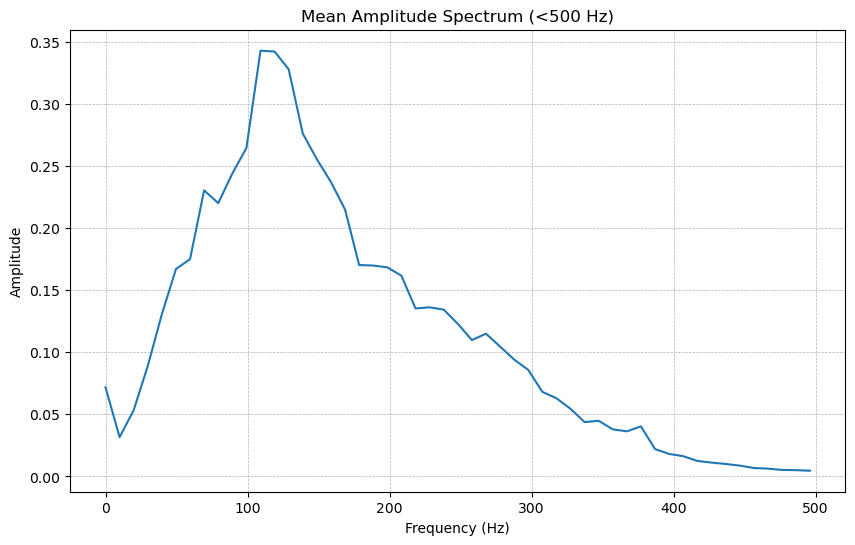

In [61]:
import matplotlib.pyplot as plt

# 1. Perform a real discrete Fourier transform along the time axis
fft_patch = patch.dft("time", real=True)

# 2. Get the amplitude spectra
amp_spectra = fft_patch.abs()

# 3. Take the mean along the distance dimension
mean_spectra = amp_spectra.mean("distance")

# 4. Select frequencies less than 500 Hz
low_freq_spectra = mean_spectra.select(ft_time=(0, 500))

# 5. Plot using matplotlib
plt.figure(figsize=(10, 6))
freq = low_freq_spectra.get_array("ft_time")

# The issue is that the data might have an extra dimension
# We need to squeeze/flatten the array to make it 1D for plotting
data_to_plot = low_freq_spectra.data.squeeze()  # Remove singleton dimensions

plt.plot(freq, data_to_plot)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Mean Amplitude Spectrum (<500 Hz)')
plt.grid(linewidth=0.5,linestyle='dashed')
plt.show()

In the next section we explore the `Spool` in more detail.
- [Github link](https://github.com/DASDAE/seg_tutorial/blob/master/03_spool.ipynb)
- [CoLab link](https://colab.research.google.com/github/DASDAE/seg_tutorial/blob/master/03_spool.ipynb)